In [ ]:
# Install missing package if not already available (run in notebook)

import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
plt.close('all')
from pathlib import Path
import seaborn as sns

In [ ]:
# Run the following lines in the terminal if package is not installed:
# python (or py) -m pip install matplotlib
# same format applies for any other missing package

Shape: (41188, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Target counts:
 y
no     36548
yes     4640
Name: count, dtype: int64

Positive (yes) rate: 11.265%

Conversion rate by poutcome (top 5):
 poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64

Conversion rate by contact:
 contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64

Conversion rate by job (top 5):
 job
student       0.314286
retired       0.252326
unemployed    0.142012
admin.        0.129726
management    0.112175
Name: y, dtype: float64

Conversion rate by month (top 5):
 month
mar    0.505495
dec    0.489011
sep    0.449123
oct    0.438719
apr    0.204787
Name: y, dtype: float64

Conversion rate by day_of_week:
 day_of_week
thu    

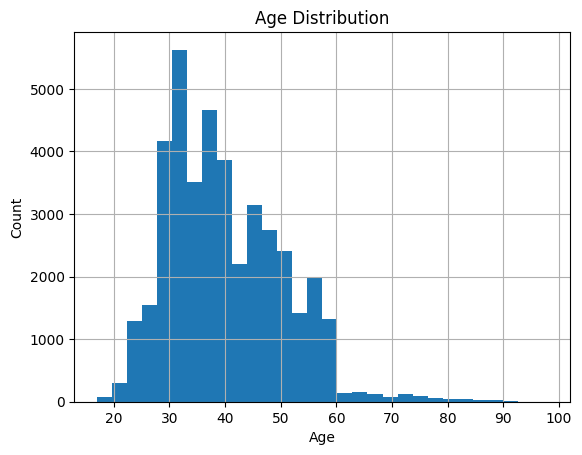

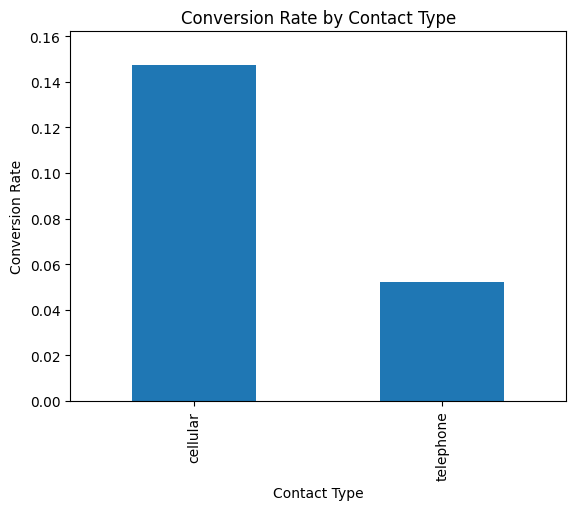

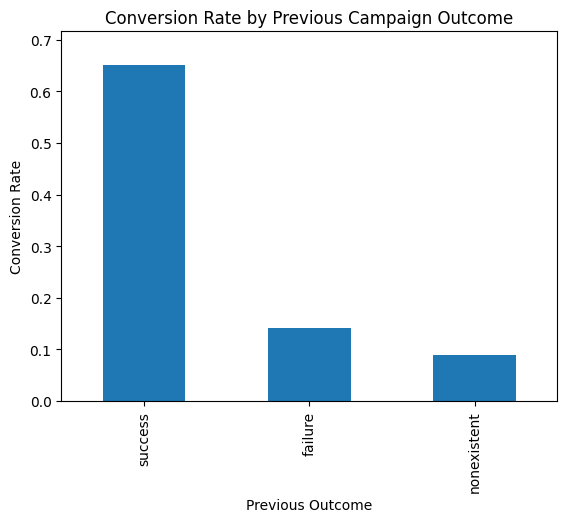

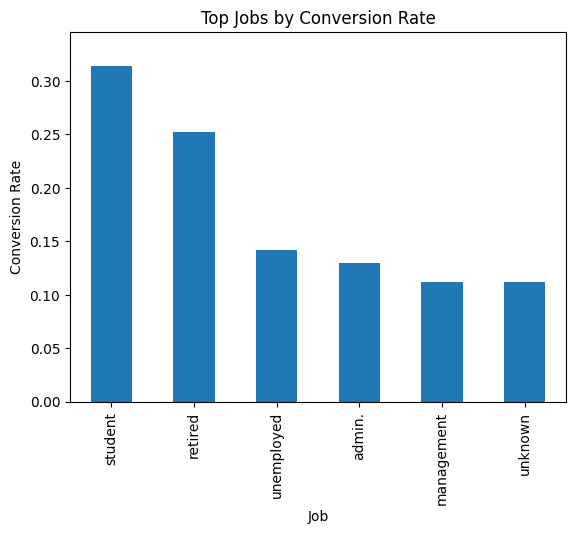

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [13]:
# The intial exploration of the full dataset used in the proposal

# Paths
base = Path("Data")
paths = {
    "bank": base / "bank.csv",
    "bank_full": base / "bank-full.csv",
    "bank_additional": base / "bank-additional.csv",
    "bank_additional_full": base / "bank-additional-full.csv",
}

# Load the main working dataset (20 inputs, ordered by date)
df = pd.read_csv(paths["bank_additional_full"], sep=';')

# Basic shape and columns
shape = df.shape
columns = df.columns.tolist()

# Target distribution
target_counts = df['y'].value_counts().sort_index()
target_rate = (df['y'] == 'yes').mean()


# Basic numeric summary (selected columns that commonly exist in the "additional" dataset)
numeric_cols = [c for c in df.columns if df[c].dtype != 'object']
numeric_summary = df[numeric_cols].describe().T

# Grouped conversion rates for a few informative categorical features
def conv_rate_by(col):
    if col in df.columns:
        tmp = df.groupby(col)['y'].apply(lambda s: (s=='yes').mean()).sort_values(ascending=False)
        return tmp
    else:
        return pd.Series(dtype=float)


cr_poutcome = conv_rate_by('poutcome')
cr_contact = conv_rate_by('contact')
cr_job = conv_rate_by('job')
cr_month = conv_rate_by('month')
cr_day_of_week = conv_rate_by('day_of_week') if 'day_of_week' in df.columns else pd.Series(dtype=float)

# Print key stats
print("Shape:", shape)
print("Columns:", columns)
print("\nTarget counts:\n", target_counts)
print(f"\nPositive (yes) rate: {target_rate:.3%}")
if len(cr_poutcome):
    print("\nConversion rate by poutcome (top 5):\n", cr_poutcome.head())
if len(cr_contact):
    print("\nConversion rate by contact:\n", cr_contact)
if len(cr_job):
    print("\nConversion rate by job (top 5):\n", cr_job.head())
if len(cr_month):
    print("\nConversion rate by month (top 5):\n", cr_month.head())
if len(cr_day_of_week):
    print("\nConversion rate by day_of_week:\n", cr_day_of_week)


# Plots
# 1) Histogram of age (if present)
if 'age' in df.columns:
    plt.figure()
    df['age'].dropna().hist(bins=30)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# 2) Bar: conversion rate by contact
if len(cr_contact):
    plt.figure()
    cr_contact.plot(kind='bar')
    plt.title("Conversion Rate by Contact Type")
    plt.xlabel("Contact Type")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_contact.max()) * 1.1))
    plt.show()

# 3) Bar: conversion rate by poutcome (top 4 categories)
if len(cr_poutcome):
    plt.figure()
    cr_poutcome.head(4).plot(kind='bar')
    plt.title("Conversion Rate by Previous Campaign Outcome")
    plt.xlabel("Previous Outcome")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_poutcome.head(4).max()) * 1.1))
    plt.show()

# 4) Bar: conversion rate by job (top 6)
if len(cr_job):
    plt.figure()
    cr_job.head(6).plot(kind='bar')
    plt.title("Top Jobs by Conversion Rate")
    plt.xlabel("Job")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_job.head(6).max()) * 1.1))
    plt.show()

# Show a compact numeric summary for quick reference
numeric_summary.head(10)



DATASET OVERVIEW
Shape: (41188, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Target Variable (Term Deposit Subscription):

     Count  Percent
y                  
no   36548    88.73
yes   4640    11.27 

AGE GROUP ANALYSIS
           Count  % of Total  Yes Count  Yes Rate (%)
age_group                                            
18-25       1063        2.58        254         23.89
26-35      13686       33.23       1666         12.17
36-45      13500       32.78       1168          8.65
46-55       8704       21.13        753          8.65
56-65       3567        8.66        484         13.57
66-75        394        0.96        173         43.91
76+          269        0.65        140         52.04 

JOB CATEGORY ANALYSIS
               Count  % of Total  Yes Count  Yes Rat

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['y'].apply(lambda s: (s=='yes').mean()).plot(kind='bar', color='skyblue')


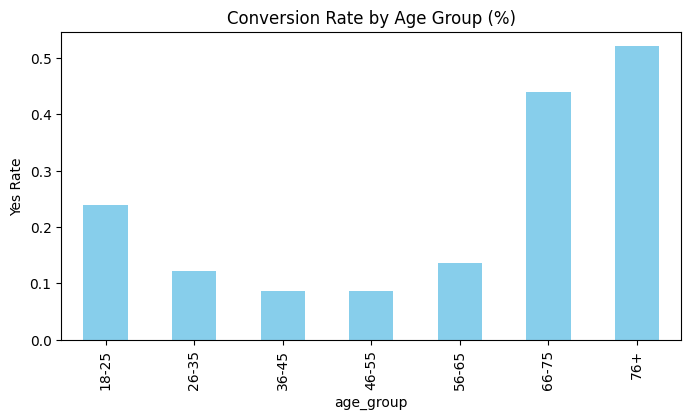

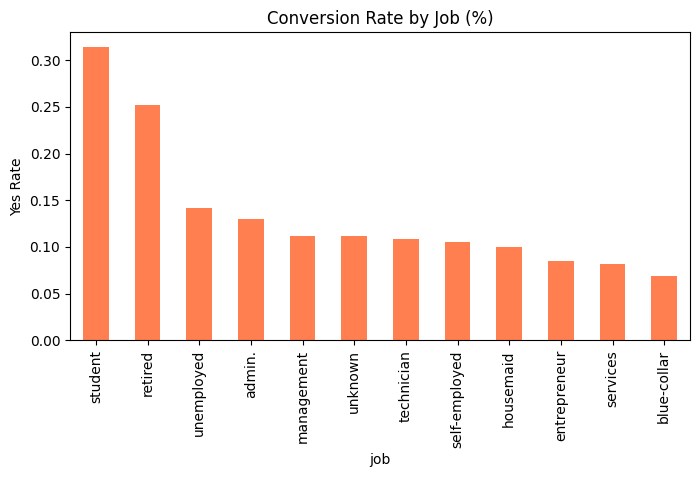

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='Set2')


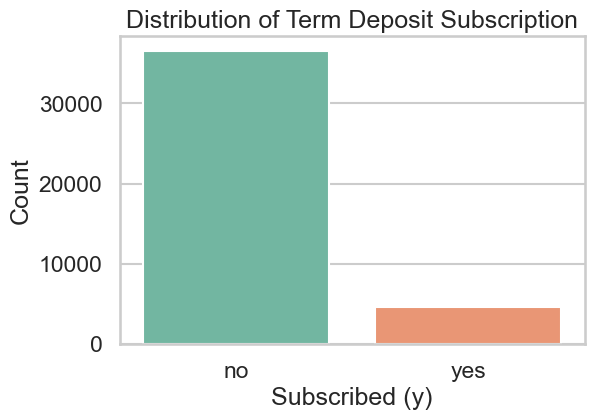

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:186: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = df.groupby('age_group')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_rate, x='age_group', y='yes_rate', palette='coolwarm')


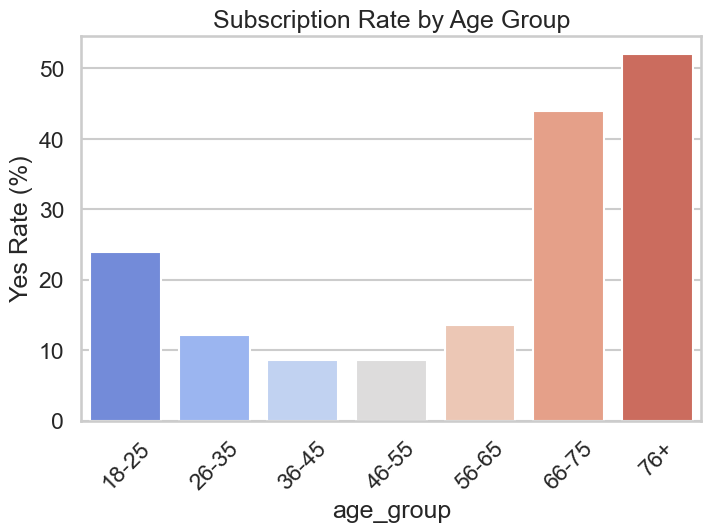

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_rate, x='job', y='yes_rate', palette='viridis')


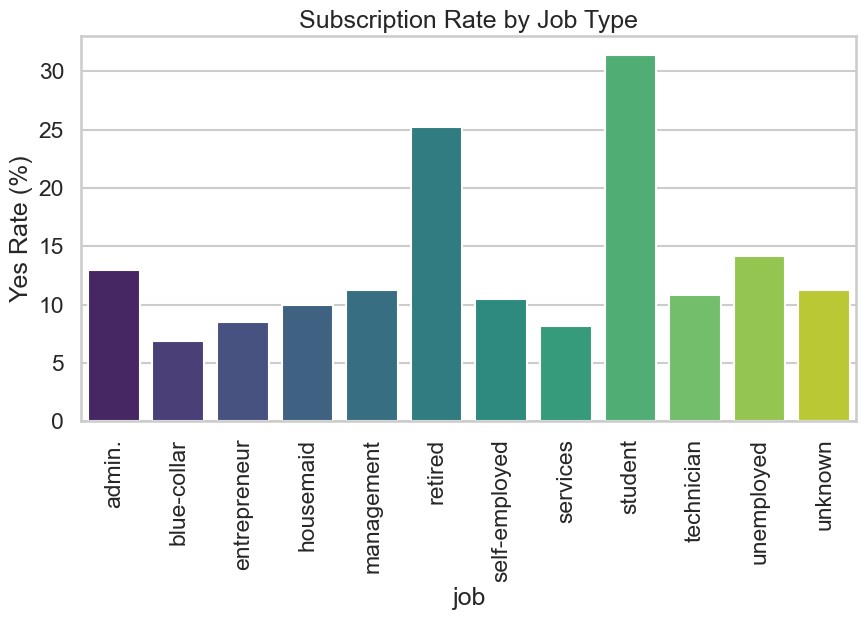

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:222: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_rate, x='education', y='yes_rate', palette='magma')


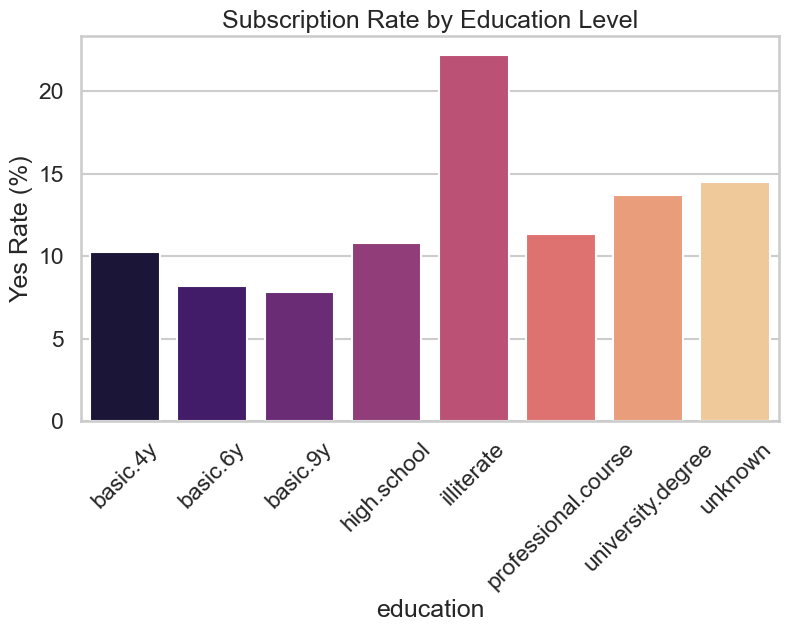

C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\3660303061.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='contact', y=(df['y']=='yes').astype(int)*100, estimator=np.mean, palette='Set1')


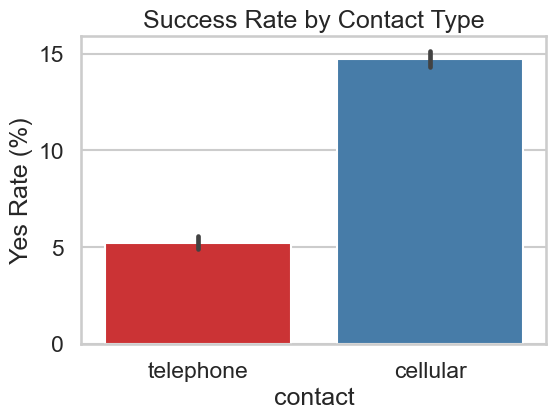

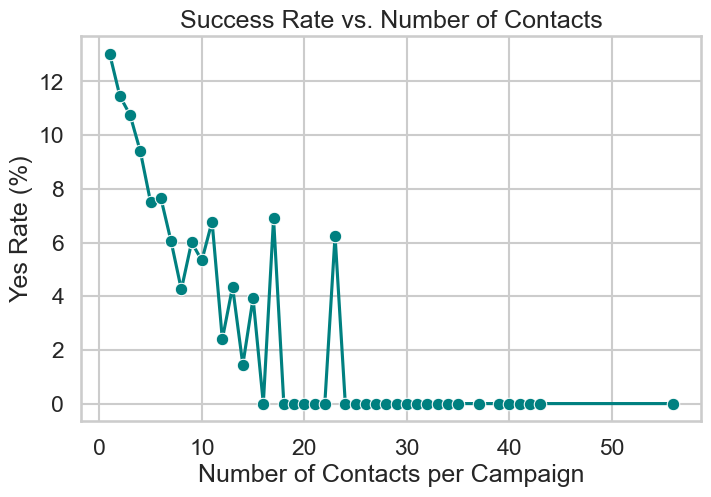

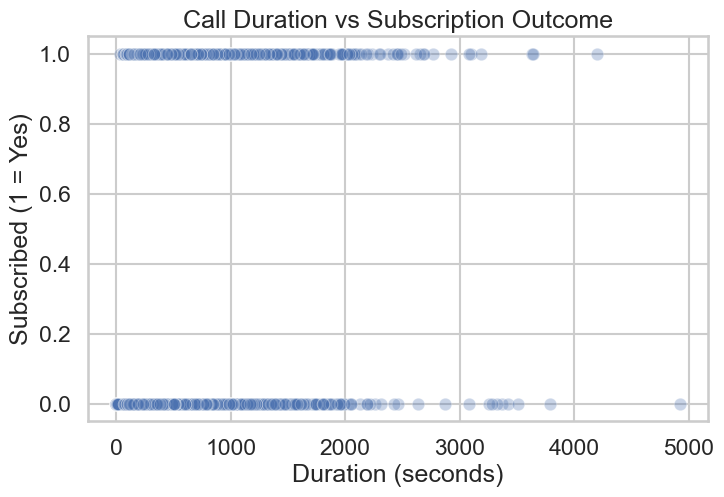

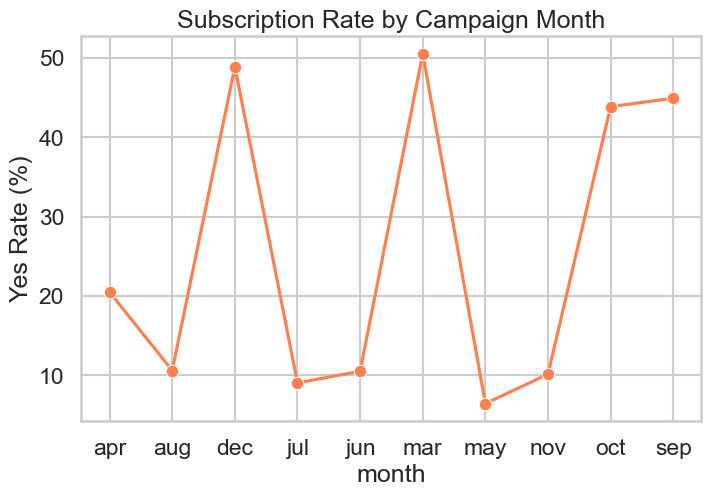

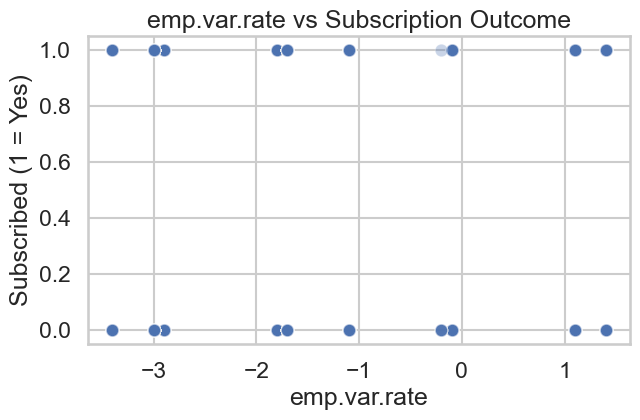

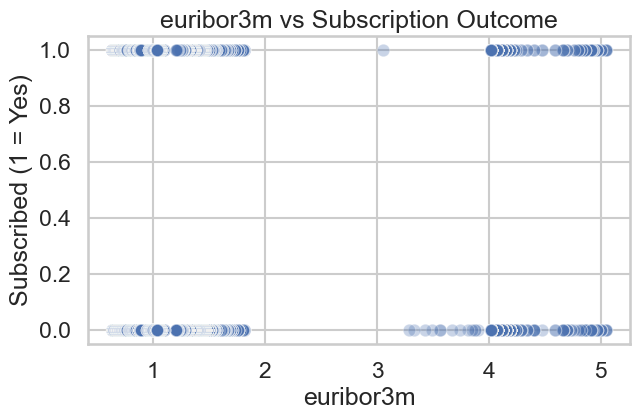

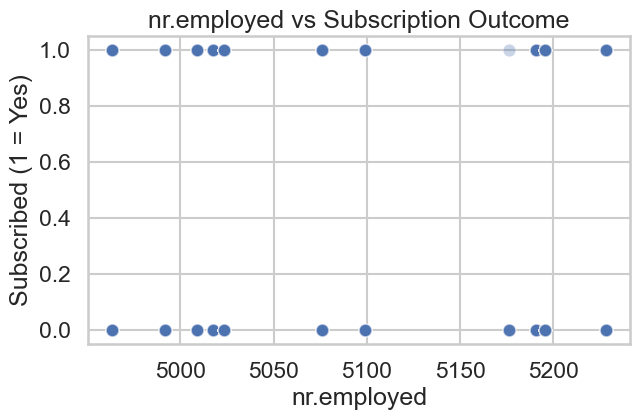

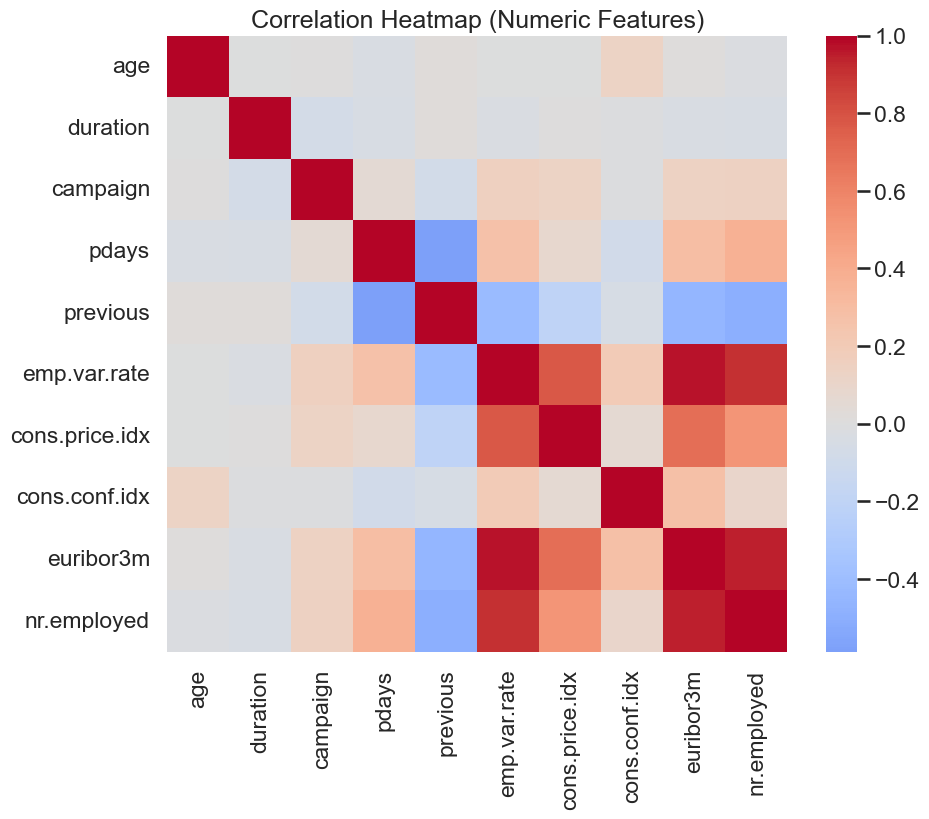

In [14]:
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# Target variable summary
target_counts = df['y'].value_counts()
target_rate = (df['y'] == 'yes').mean()
target_table = pd.DataFrame({
    "Count": target_counts,
    "Percent": round(target_counts / len(df) * 100, 2)
})
print("Target Variable (Term Deposit Subscription):\n")
print(target_table, "\n")

# === 1. AGE GROUPING ===
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_summary = df['age_group'].value_counts().sort_index()
age_yes_summary = df[df['y']=='yes']['age_group'].value_counts().sort_index()

age_table = pd.DataFrame({
    "Count": age_summary,
    "% of Total": round(age_summary / len(df) * 100, 2),
    "Yes Count": age_yes_summary,
    "Yes Rate (%)": round(age_yes_summary / age_summary * 100, 2)
}).fillna(0)

print("="*70)
print("AGE GROUP ANALYSIS")
print("="*70)
print(age_table, "\n")

# === 2. JOB DISTRIBUTION ===
job_summary = df['job'].value_counts()
job_yes_summary = df[df['y']=='yes']['job'].value_counts()

job_table = pd.DataFrame({
    "Count": job_summary,
    "% of Total": round(job_summary / len(df) * 100, 2),
    "Yes Count": job_yes_summary,
    "Yes Rate (%)": round(job_yes_summary / job_summary * 100, 2)
}).fillna(0).sort_values("Yes Rate (%)", ascending=False)

print("="*70)
print("JOB CATEGORY ANALYSIS")
print("="*70)
print(job_table, "\n")

# === 3. MARITAL STATUS ===
marital_summary = df['marital'].value_counts()
marital_yes_summary = df[df['y']=='yes']['marital'].value_counts()

marital_table = pd.DataFrame({
    "Count": marital_summary,
    "% of Total": round(marital_summary / len(df) * 100, 2),
    "Yes Count": marital_yes_summary,
    "Yes Rate (%)": round(marital_yes_summary / marital_summary * 100, 2)
}).fillna(0)

print("="*70)
print("MARITAL STATUS ANALYSIS")
print("="*70)
print(marital_table, "\n")

# === 4. EDUCATION ===
edu_summary = df['education'].value_counts()
edu_yes_summary = df[df['y']=='yes']['education'].value_counts()

edu_table = pd.DataFrame({
    "Count": edu_summary,
    "% of Total": round(edu_summary / len(df) * 100, 2),
    "Yes Count": edu_yes_summary,
    "Yes Rate (%)": round(edu_yes_summary / edu_summary * 100, 2)
}).fillna(0)

print("="*70)
print("EDUCATION LEVEL ANALYSIS")
print("="*70)
print(edu_table, "\n")

# === 5. DEFAULT / CREDIT ===
default_table = pd.crosstab(df['default'], df['y'], margins=True)
default_rate = df.groupby('default')['y'].apply(lambda s: (s=='yes').mean())
print("="*70)
print("CREDIT DEFAULT ANALYSIS")
print("="*70)
print(default_table, "\n")
print("Yes Rate by Default Status (%):\n", round(default_rate * 100, 2), "\n")

# === 6. HOUSING LOAN ===
housing_table = pd.crosstab(df['housing'], df['y'], margins=True)
housing_rate = df.groupby('housing')['y'].apply(lambda s: (s=='yes').mean())
print("="*70)
print("HOUSING LOAN ANALYSIS")
print("="*70)
print(housing_table, "\n")
print("Yes Rate by Housing Loan (%):\n", round(housing_rate * 100, 2), "\n")

# === 7. PERSONAL LOAN ===
loan_table = pd.crosstab(df['loan'], df['y'], margins=True)
loan_rate = df.groupby('loan')['y'].apply(lambda s: (s=='yes').mean())
print("="*70)
print("PERSONAL LOAN ANALYSIS")
print("="*70)
print(loan_table, "\n")
print("Yes Rate by Personal Loan (%):\n", round(loan_rate * 100, 2), "\n")

# === 8. CONTACT TYPE ===
contact_table = df['contact'].value_counts().to_frame('Count')
contact_table['% of Total'] = round(contact_table['Count'] / len(df) * 100, 2)
contact_table['Yes Rate (%)'] = round(df.groupby('contact')['y'].apply(lambda s: (s=='yes').mean()) * 100, 2)

print("="*70)
print("CONTACT TYPE ANALYSIS")
print("="*70)
print(contact_table, "\n")

# === 9. CAMPAIGN ===
campaign_yes_rate = df.groupby('campaign')['y'].apply(lambda s: (s=='yes').mean() * 100)
print("="*70)
print("CAMPAIGN CONTACTS VS YES RATE")
print("="*70)
print(campaign_yes_rate.head(10), "\n")

# === 10. PDAYS (previous contact) ===
df['was_contacted_before'] = df['pdays'].apply(lambda x: x != 999)
pdays_table = df['was_contacted_before'].value_counts().to_frame('Count')
pdays_table['% of Total'] = round(pdays_table['Count'] / len(df) * 100, 2)
pdays_table['Yes Rate (%)'] = round(df.groupby('was_contacted_before')['y'].apply(lambda s: (s=='yes').mean()) * 100, 2)

print("="*70)
print("PREVIOUS CONTACT (PDAYS) ANALYSIS")
print("="*70)
print(pdays_table, "\n")

# === 11. ECONOMIC INDICATORS ===
econ_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
econ_summary = df[econ_cols].describe().T
econ_corr = df[econ_cols + ['y']].assign(y=(df['y']=='yes').astype(int)).corr()['y']

print("="*70)
print("ECONOMIC INDICATORS SUMMARY")
print("="*70)
print(econ_summary, "\n")
print("Correlation with Target (y=1 for Yes):\n", round(econ_corr, 3), "\n")

# === VISUAL HIGHLIGHTS ===
plt.figure(figsize=(8,4))
df.groupby('age_group')['y'].apply(lambda s: (s=='yes').mean()).plot(kind='bar', color='skyblue')
plt.title("Conversion Rate by Age Group (%)")
plt.ylabel("Yes Rate")
plt.show()

plt.figure(figsize=(8,4))
df.groupby('job')['y'].apply(lambda s: (s=='yes').mean()).sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("Conversion Rate by Job (%)")
plt.ylabel("Yes Rate")
plt.show()

# Set a clean style
sns.set(style="whitegrid", context="talk")

# ==========================================================
# 1. Target Variable Overview
# ==========================================================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y', palette='Set2')
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

# ----------------------------------------------------------
# Insight:
# Confirms imbalance: only ~11% said "yes" — important for model design.
# ----------------------------------------------------------


# ==========================================================
# 2. Subscription Rate by Age Group
# ==========================================================
age_rate = df.groupby('age_group')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
plt.figure(figsize=(8,5))
sns.barplot(data=age_rate, x='age_group', y='yes_rate', palette='coolwarm')
plt.title('Subscription Rate by Age Group')
plt.ylabel('Yes Rate (%)')
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------------------------
# Insight:
# Older age groups (66+) show much higher subscription likelihood.
# ----------------------------------------------------------


# ==========================================================
# 3. Subscription Rate by Job Category
# ==========================================================
job_rate = df.groupby('job')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
plt.figure(figsize=(10,5))
sns.barplot(data=job_rate, x='job', y='yes_rate', palette='viridis')
plt.title('Subscription Rate by Job Type')
plt.ylabel('Yes Rate (%)')
plt.xticks(rotation=90)
plt.show()

# ----------------------------------------------------------
# Insight:
# Students and retired clients respond most positively; blue-collar least likely.
# ----------------------------------------------------------


# ==========================================================
# 4. Subscription Rate by Education Level
# ==========================================================
edu_rate = df.groupby('education')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
plt.figure(figsize=(9,5))
sns.barplot(data=edu_rate, x='education', y='yes_rate', palette='magma')
plt.title('Subscription Rate by Education Level')
plt.ylabel('Yes Rate (%)')
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------------------------
# Insight:
# Higher education correlates with better engagement (especially university degree).
# ----------------------------------------------------------


# ==========================================================
# 5. Contact Type Success Rate
# ==========================================================
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='contact', y=(df['y']=='yes').astype(int)*100, estimator=np.mean, palette='Set1')
plt.title('Success Rate by Contact Type')
plt.ylabel('Yes Rate (%)')
plt.show()

# ----------------------------------------------------------
# Insight:
# Cellular calls are more successful than telephone contacts.
# ----------------------------------------------------------


# ==========================================================
# 6. Campaign Contacts vs. Success Rate
# ==========================================================
campaign_rate = df.groupby('campaign')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
plt.figure(figsize=(8,5))
sns.lineplot(data=campaign_rate, x='campaign', y='yes_rate', marker='o', color='teal')
plt.title('Success Rate vs. Number of Contacts')
plt.ylabel('Yes Rate (%)')
plt.xlabel('Number of Contacts per Campaign')
plt.show()

# ----------------------------------------------------------
# Insight:
# Diminishing returns after 3–4 contacts — persistence reduces success rate.
# ----------------------------------------------------------


# ==========================================================
# 7. Duration vs. Subscription Outcome
# ==========================================================
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='duration', y=(df['y']=='yes').astype(int), alpha=0.3)
plt.title('Call Duration vs Subscription Outcome')
plt.xlabel('Duration (seconds)')
plt.ylabel('Subscribed (1 = Yes)')
plt.show()

# ----------------------------------------------------------
# Insight:
# Longer call durations are highly correlated with successful subscriptions.
# ----------------------------------------------------------


# ==========================================================
# 8. Month vs. Subscription Rate
# ==========================================================
month_rate = df.groupby('month')['y'].apply(lambda s: (s=='yes').mean()*100).reset_index(name='yes_rate')
plt.figure(figsize=(8,5))
sns.lineplot(data=month_rate, x='month', y='yes_rate', marker='o', color='coral')
plt.title('Subscription Rate by Campaign Month')
plt.ylabel('Yes Rate (%)')
plt.show()

# ----------------------------------------------------------
# Insight:
# Certain months (like May or November) might perform better — timing matters.
# ----------------------------------------------------------


# ==========================================================
# 9. Economic Indicators vs. Subscription (Scatter)
# ==========================================================
econ_vars = ['emp.var.rate', 'euribor3m', 'nr.employed']
for col in econ_vars:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y=(df['y']=='yes').astype(int), alpha=0.3)
    plt.title(f'{col} vs Subscription Outcome')
    plt.ylabel('Subscribed (1 = Yes)')
    plt.show()

# ----------------------------------------------------------
# Insight:
# As employment and interest rates rise, fewer people subscribe — opposite during downturns.
# ----------------------------------------------------------


# ==========================================================
# 10. Correlation Heatmap (Numeric Features)
# ==========================================================
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# ----------------------------------------------------------
# Insight:
# Negative correlations between "y" and economic indicators highlight macroeconomic influence.
# ----------------------------------------------------------



Campaign Contact Category Summary:
  campaign_category  count  yes_count  yes_rate_pct
0         1 contact  17642       2300     13.037071
1        2 contacts  10570       1211     11.456954
2        3 contacts   5341        574     10.747051
3      4-5 contacts   4250        369      8.682353
4     6-10 contacts   2516        159      6.319555
5    11-20 contacts    712         26      3.651685
6      21+ contacts    157          1      0.636943


C:\Users\rythe\AppData\Local\Temp\ipykernel_18048\336713413.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('campaign_category')


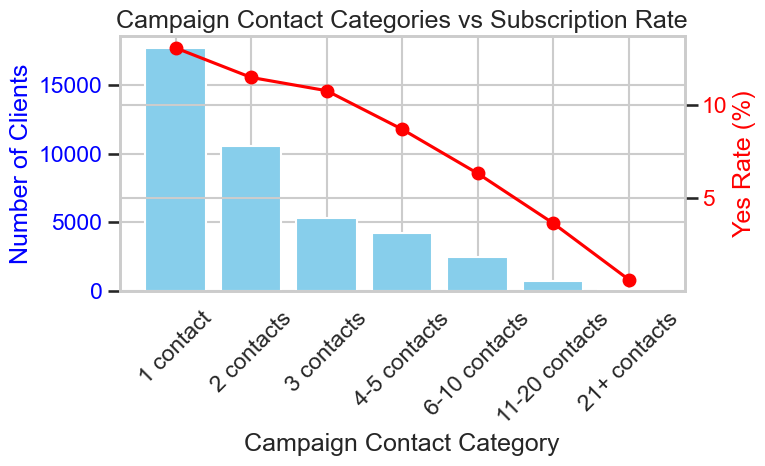

In [20]:
# Define contact categories (bins)
bins = [0, 1, 2, 3, 5, 10, 20, df['campaign'].max()]
labels = ['1 contact', '2 contacts', '3 contacts', '4-5 contacts', '6-10 contacts', '11-20 contacts', '21+ contacts']

# Create categorical column
df['campaign_category'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=True)

# Group by category to find count and yes rate
campaign_cat_summary = (
    df.groupby('campaign_category')
      .agg(
          count=('campaign', 'size'),
          yes_count=('y', lambda s: (s == 'yes').sum())
      )
      .assign(yes_rate_pct=lambda x: (x['yes_count'] / x['count']) * 100)
      .reset_index()
)

# Display summary
print("\nCampaign Contact Category Summary:")
print(campaign_cat_summary)

# Optional: Plot for visualization
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for count
ax1.bar(campaign_cat_summary['campaign_category'], campaign_cat_summary['count'], color='skyblue', label='Count')
ax1.set_xlabel('Campaign Contact Category')
ax1.set_ylabel('Number of Clients', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Line plot for yes rate
ax2 = ax1.twinx()
ax2.plot(campaign_cat_summary['campaign_category'], campaign_cat_summary['yes_rate_pct'], color='red', marker='o', label='Yes Rate (%)')
ax2.set_ylabel('Yes Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Campaign Contact Categories vs Subscription Rate')
fig.tight_layout()
plt.show()
